# (Core) Resampling Datetime Data

## Assignment

- We will be working with a modified version of weather data from London.

The assignment is split into 2 parts:

   - Part 1: Load the data and create a datetime index

   - Part 2: Answer 2 Questions using visualizations and the correct frequency data

## Part 1) Load the data and make a datetime index

You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.


2. Set the date column as the index.


3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth


4. Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [1]:
# Imports

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# Load Data

df= pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### 1. Convert the date column to datetime dtype

In [3]:
# displaying random sample
df['date'].sample(n=10).sort_index()

1150     19820224
2245     19850223
3845     19890712
4618     19910824
6434     19960813
10663    20080312
11912    20110813
12322    20120926
13857    20161209
14206    20171123
Name: date, dtype: int64

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### 2. Set the date column as the index

In [6]:
df = df.set_index('date')

df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### 3. Filter out only the required data:

- Keep only data from the year 2000 or later

In [7]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [8]:
df = df.loc['2000':'2020']

df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [9]:
df = df.drop(columns= ['cloud_cover', 'sunshine', 'global_radiation', 
                      'pressure'])

df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


### 4. Impute any missing values

In [10]:
df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [11]:
# max_temp
df['max_temp']= df['max_temp'].interpolate()

# mean_temp
df['mean_temp']= df['mean_temp'].interpolate()

# min_temp
df['min_temp']= df['min_temp'].interpolate()

# precipitation
df['precipitation']= df['precipitation'].fillna(0)

# snow_depth
df['snow_depth']= df['snow_depth'].fillna(0)


df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)


- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.
    
**Note:** you may want to make a temporary DataFrame that you will use to answer this question only.

### 1. What month had the most precipitation between 2000 through 2010?

- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

In [12]:
# DataFrame copy
df1 = df.copy()

df1.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [13]:
df1 = df1.loc['2000': '2010']

df1

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2010-12-27,8.0,0.2,-4.6,5.0,1.0
2010-12-28,9.5,5.3,2.5,0.4,0.0
2010-12-29,7.7,6.8,4.1,1.4,0.0


In [14]:
pcp= df1['precipitation'].copy()
pcp

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [15]:
pcp_ms_res= pcp.resample('M').sum()
pcp_ms_res.name= 'Total Precipitation'
pcp_ms_res.head()

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
Freq: M, Name: Total Precipitation, dtype: float64

In [16]:
max_pcp= pcp_ms_res.max()
max_pcp

138.4

In [17]:
max_pcp_mon= pcp_ms_res[pcp_ms_res == 138.4]
max_pcp_mon

date
2009-11-30    138.4
Freq: M, Name: Total Precipitation, dtype: float64

   - November, 2009 is the month that had the highest precipitation.

Visuals

- Create a wide figure (e.g. figsize=(12,3))
    - With the title "Precipitation for 2000-2010"
    - With a ylabel of "Inches"
- Customize the major xaxis ticks to:
    - Have major xaxis ticks every 1 year.
    - Use 4-digit years for the labels
    - Rotate the major ticks' labels 90 degrees.
- Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 3 months
    - Do not label the minor ticks.

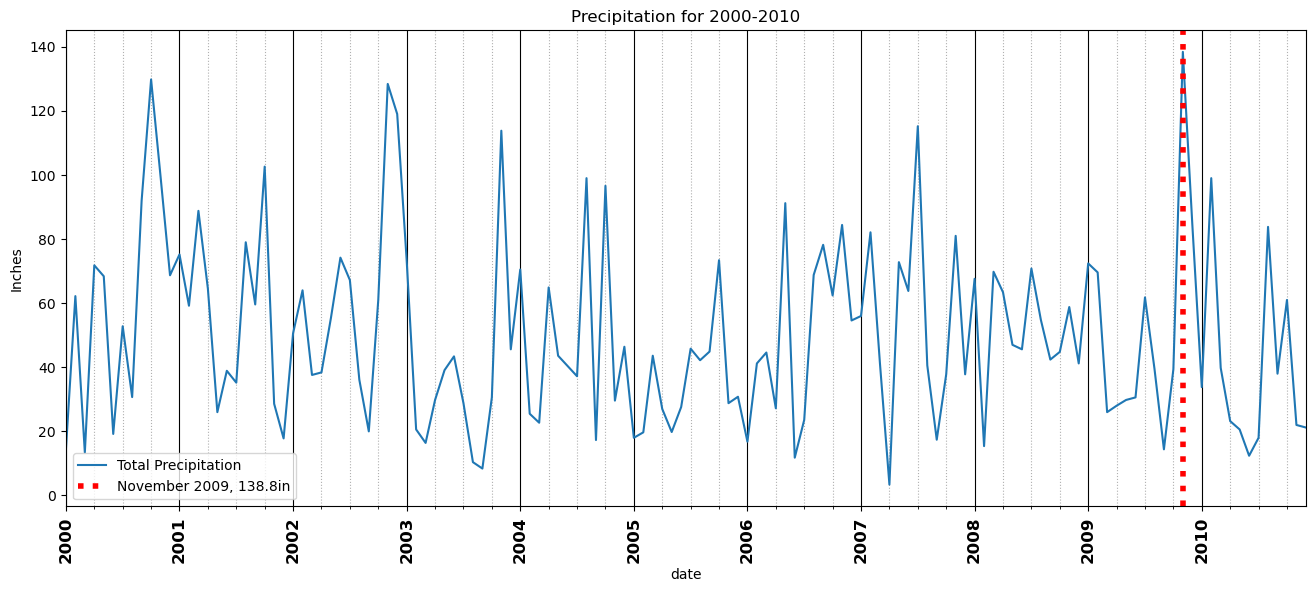

In [18]:
fig, ax= plt.subplots(figsize=(16,7))

pcp_ms_res.plot(ax=ax, title= 'Precipitation for 2000-2010', ylabel= 'Inches');

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 'large', fontweight='bold')

# Custom major&minor ticks
ax.grid(which='minor', axis='x', ls=':')
ax.grid(which='major', axis='x', color='black')

# Vertical line for max precipitation
ax.axvline('2009-11-30', color= 'red', lw= 4, ls=':', label= 'November 2009, 138.8in')

fig.autofmt_xdate(rotation=90, ha='center')
ax.legend();

### 2. Which year between 2000-2020 had the coolest average temperature?

- Resample the data as Yearly frequency.

- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.


In [19]:
# Copy of DataFrame
df2= df.copy()

df2.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [20]:
mt= df2['mean_temp'].copy()

mt

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [21]:
# Resample data as Yearly
mt_res= mt.resample('A').mean()
mt_res.head()

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
Freq: A-DEC, Name: mean_temp, dtype: float64

In [23]:
mt_low= mt_res.min()

mt_low

10.657397260273973

In [24]:
min_mt= mt_res[mt_res == 10.657397260273973]
min_mt

date
2010-12-31    10.657397
Freq: A-DEC, Name: mean_temp, dtype: float64

- The Year 2010 had the coolest average temperature. 

Visuals

- Create a wide figure (e.g. figsize=(12,3))
    - With the title "Average Temperature"
    - With a ylabel of "Degrees"
- Customize the major xaxis ticks to:
    - Have major xaxis ticks every 5 years.
    - Use 4-digit years for the labels
    - Rotate the major ticks' labels 90 degrees.
- Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 1 year
    - Do not label the minor ticks.

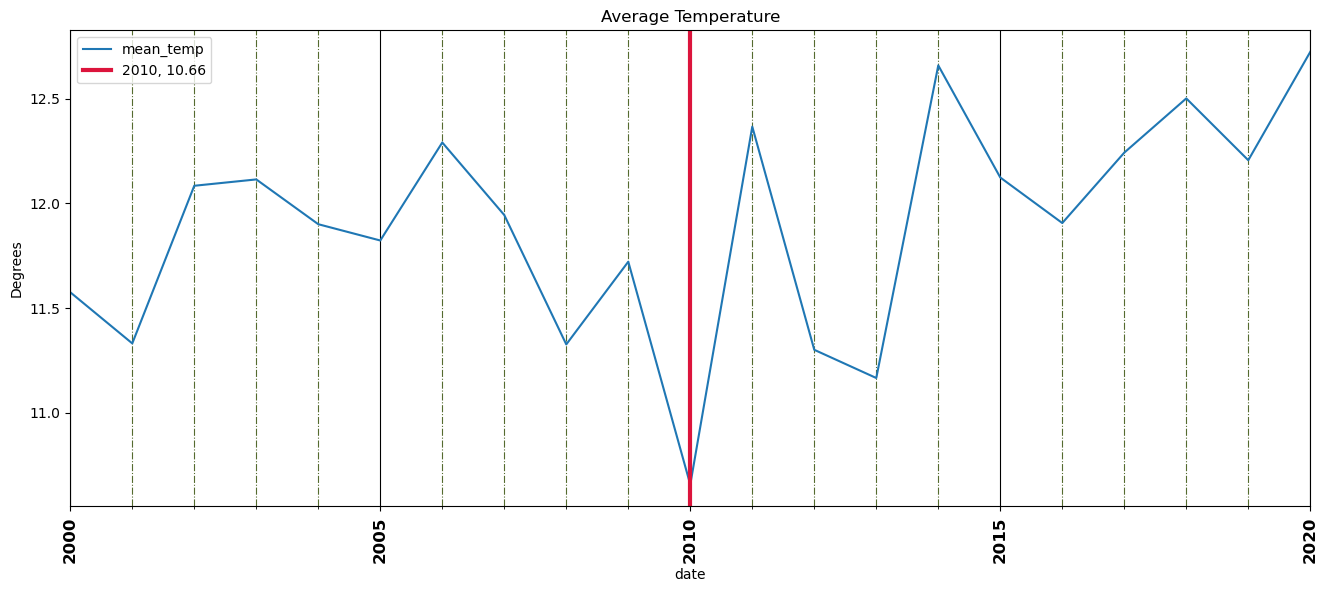

In [26]:
fig, ax= plt.subplots(figsize= (16,7))

mt_res.plot(ax=ax, title= 'Average Temperature', ylabel= 'Degrees')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize= 'large', fontweight='bold')

# Custom Major/Minor ticks
ax.grid(which= 'major', axis='x', color= 'black')
ax.grid(which= 'minor', axis='x', ls='dashdot', color= 'darkolivegreen')

ax.axvline('2010', color= 'crimson', lw= 3, ls= '-', label= '2010, 10.66')

fig.autofmt_xdate(rotation=90, ha= 'center')
ax.legend();